<a href="https://colab.research.google.com/github/dwhew/Bitou-bush/blob/main/Bitou.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install geopandas
!pip install contextily

In [2]:
import geopandas as gpd
import pandas as pd
import shapely
from shapely import wkt
import contextily as ctx
import folium

In [3]:
#strangly Geopandas could not read the csv so I used pandas 
s = pd.read_csv(r'https://raw.githubusercontent.com/dwhew/Bitou-bush/main/bitou.csv', index_col='FID') 
#geopandas also cannot read the geomery properly, so I had to convert it manually to a GeoSeries

s['geometry'] = s['geometry'].apply(wkt.loads)
#and then converted to geopandas
df = gpd.GeoDataFrame(s)
df

,geometry,Activity,ActivityDa,MonYr,FinYr,Detection1,Date_S,lon,lat
FID,,,,,,,,,
0,POINT Z (153.13481 -26.71795 0.00000),Infestation,1/03/2015,2015-03,2014 - 2015,<Null>,Jan15_Jun15,153.134807,-26.717955
1,POINT Z (153.43067 -27.31563 0.00000),Infestation,25/03/2015,2015-03,2014 - 2015,<Null>,Jan15_Jun15,153.430668,-27.315630
2,POINT Z (153.42508 -27.30358 0.00000),Infestation,25/03/2015,2015-03,2014 - 2015,<Null>,Jan15_Jun15,153.425080,-27.303577
3,POINT Z (153.11057 -25.56516 0.00000),Infestation,1/05/2015,2015-05,2014 - 2015,<Null>,Jan15_Jun15,153.110568,-25.565162
4,POINT Z (153.08553 -25.76300 0.00000),Infestation,29/04/2015,2015-04,2014 - 2015,<Null>,Jan15_Jun15,153.085534,-25.763001
...,...,...,...,...,...,...,...,...,...
2455,POINT Z (153.43967 -27.76958 0.00000),Survey,8/07/2020,NaN,2019 - 2020,8/07/2020,Jan20 - Jun20,153.439668,-27.769584
2456,POINT Z (153.43592 -27.78790 0.00000),Survey,8/07/2020,NaN,2019 - 2020,8/07/2020,Jan20 - Jun20,153.435918,-27.787899
2457,POINT Z (153.43988 -27.77067 0.00000),Survey,8/07/2020,NaN,2019 - 2020,8/07/2020,Jan20 - Jun20,153.439884,-27.770671


In [4]:
type(df['geometry'])

geopandas.geoseries.GeoSeries

In [5]:
df['Activity'].unique()

 


array(['Infestation', 'Treatment', 'InfestTreat', 'Survey'], dtype=object)

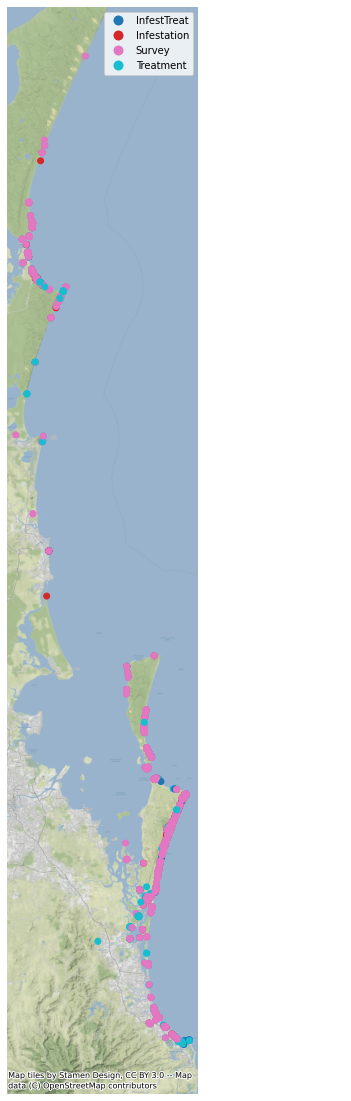

In [6]:
# plot points with matplotlib - colour coded by activity

fig = df.plot(figsize=(20, 20), column='Activity', legend=True)
ctx.add_basemap(fig, zoom=12, crs='EPSG:4326')   #add basemap using contextily
fig.set_axis_off()


In [12]:
#here im using folium for an interactive map (great but unfortunalty slow)
survey_points = df[df['Activity'] == 'Survey']

m = folium.Map(location=(df['lat'][0], df['lon'][0]), prefer_canvas=True)  #prefer_canvas apparently helps the speed

for lat, lon, label in zip(survey_points['lat'],survey_points['lon'], survey_points['ActivityDa']):
  folium.Marker(
    location=[lat, lon],
    popup=label,    
).add_to(m)

m.save("bitou_map.html")
m


In [14]:
survey_points.ActivityDa.unique()

array(['24/01/2019', '13/02/2019', '18/02/2019', '4/03/2019', '7/03/2019',
       '25/03/2019', '26/03/2019', '27/03/2019', '28/03/2019',
       '29/04/2019', '30/04/2019', '1/05/2019', '2/05/2019', '3/05/2019',
       '7/05/2019', '8/05/2019', '9/05/2019', '10/05/2019', '20/05/2019',
       '21/05/2019', '22/05/2019', '23/05/2019', '27/05/2019',
       '28/05/2019', '29/05/2019', '30/05/2019', '4/06/2019',
       '19/06/2019', '20/06/2019', '24/06/2019', '21/08/2019',
       '3/09/2019', '2/10/2019', '14/10/2019', '15/10/2019', '16/10/2019',
       '17/10/2019', '18/10/2019', '21/10/2019', '22/10/2019',
       '23/10/2019', '24/10/2019', '25/10/2019', '5/11/2019', '6/11/2019',
       '7/11/2019', '11/11/2019', '4/12/2019', '11/12/2019', '4/02/2020',
       '5/02/2020', '15/01/2020', '19/02/2020', '24/02/2020',
       '25/03/2020', '16/06/2020', '7/07/2020', '8/07/2020'], dtype=object)

In [10]:
df['Activity'].value_counts()

Survey         1265
Infestation     514
Treatment       436
InfestTreat     245
Name: Activity, dtype: int64